# 1 Layer NN

In [1]:
import numpy as np
np.random.seed(1)

In [2]:
X = np.array([[0,1,0],
              [1,0,0],
              [1,1,1],
              [0,1,1]])

y = np.array([[0,1,1,0]]).T

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
W = 2*np.random.random((3,1)) - 1
b = 0

In [5]:
z = X.dot(W) + b

In [6]:
A = sigmoid(z)

In [7]:
print(A)

[[ 0.60841366]
 [ 0.45860596]
 [ 0.3262757 ]
 [ 0.36375058]]


In [8]:
def bce_loss(y,y_hat):
  N = y.shape[0]
  loss = -1/N * np.sum((y*np.log(y_hat) + (1 - y)*np.log(1-y_hat)))
  return loss 

In [9]:
bce_loss(y,A)

0.82232258208779863

In [10]:
import numpy as np
np.random.seed(1)

X = np.array([[0,1,0],
              [1,0,0],
              [1,1,1],
              [0,1,1]])

y = np.array([[0,1,1,0]]).T

def sigmoid(x):
    return 1/(1+np.exp(-x))

def bce_loss(y,y_hat):
    N = y.shape[0]
    loss = -1/N * np.sum((y*np.log(y_hat) + (1 - y)*np.log(1-y_hat)))
    return loss 


W = 2*np.random.random((3,1)) - 1
b = 0


alpha = 1
epochs = 20

N = y.shape[0]

losses = []
for i in range(epochs):
    z = X.dot(W) + b
    A = sigmoid(z)
    
    loss = bce_loss(y,A)
    print('Epoch:',i,'Loss:',loss)
    losses.append(loss)
    
    dz = (A - y)
    dW = 1/N * np.dot(X.T,dz)
    db = 1/N * np.sum(dz,axis=0,keepdims=True)      
    W -= alpha * dW
    b -= alpha * db

Epoch: 0 Loss: 0.822322582088
Epoch: 1 Loss: 0.722897448125
Epoch: 2 Loss: 0.646837651208
Epoch: 3 Loss: 0.584116122241
Epoch: 4 Loss: 0.530908161024
Epoch: 5 Loss: 0.48523717872
Epoch: 6 Loss: 0.445747750118
Epoch: 7 Loss: 0.411391164148
Epoch: 8 Loss: 0.381326093762
Epoch: 9 Loss: 0.354869998127
Epoch: 10 Loss: 0.331466036109
Epoch: 11 Loss: 0.310657702141
Epoch: 12 Loss: 0.292068863232
Epoch: 13 Loss: 0.275387990352
Epoch: 14 Loss: 0.260355695915
Epoch: 15 Loss: 0.246754868981
Epoch: 16 Loss: 0.234402844624
Epoch: 17 Loss: 0.22314516463
Epoch: 18 Loss: 0.21285058467
Epoch: 19 Loss: 0.203407060401


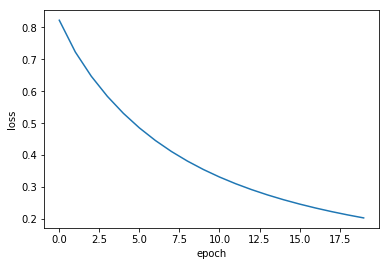

In [12]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
#fig.savefig('loss.jpg')

# 2 layer NN example

In [13]:
# Package imports
# Matplotlib is a matlab like plotting library
import matplotlib
import matplotlib.pyplot as plt
# Numpy handles matrix operations
import numpy as np
# SciKitLearn is a useful machine learning utilities library
import sklearn
# The sklearn dataset module helps generating datasets
import sklearn.datasets
import sklearn.linear_model


# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [14]:
# Just some helper functions we moved over from the last chapter
# sigmoid function
def sigmoid(x):
    '''
    Calculates the sigmoid activation of a given input x
    See: https://en.wikipedia.org/wiki/Sigmoid_function
    '''
    return 1/(1+np.exp(-x))

#Log Loss function
def bce_loss(y,y_hat):
    '''
    Calculates the logistic loss between a prediction y_hat and the labels y
    See: http://wiki.fast.ai/index.php/Log_Loss

    We need to clip values that get too close to zero to avoid zeroing out. 
    Zeroing out is when a number gets so small that the computer replaces it with 0.
    Therefore, we clip numbers to a minimum value.
    '''
    minval = 0.000000000001
    N = y.shape[0]
    l = -1/N * np.sum(y * np.log(y_hat.clip(min=minval)) + (1-y) * np.log((1-y_hat).clip(min=minval)))
    return l

# Log loss derivative
def bce_loss_derivative(y,y_hat):
    '''
    Calculates the gradient (derivative) of the log loss between point y and y_hat
    See: https://stats.stackexchange.com/questions/219241/gradient-for-logistic-loss-function
    '''
    return (y_hat-y)


In [15]:
def forward_prop(model,a0):
    '''
    Forward propagates through the model, stores results in cache.
    See: https://stats.stackexchange.com/questions/147954/neural-network-forward-propagation
    A0 is the activation at layer zero, it is the same as X
    '''
    
    # Load parameters from model
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Linear step
    z1 = a0.dot(W1) + b1
    
    # First activation function
    a1 = np.tanh(z1)
    
    # Second linear step
    z2 = a1.dot(W2) + b2
    
    # Second activation function
    a2 = sigmoid(z2)
    cache = {'a0':a0,'z1':z1,'a1':a1,'z1':z1,'a2':a2}
    return cache

In [16]:
def tanh_derivative(x):
    '''
    Calculates the derivative of the tanh function that is used as the first activation function
    See: https://socratic.org/questions/what-is-the-derivative-of-tanh-x
    '''
    return (1 - np.power(x, 2))

In [17]:
def backward_prop(model,cache,y):
    '''
    Backward propagates through the model to calculate gradients.
    Stores gradients in grads dictionary.
    See: https://en.wikipedia.org/wiki/Backpropagation
    '''
    # Load parameters from model
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Load forward propagation results
    a0,a1, a2 = cache['a0'],cache['a1'],cache['a2']
    
    # Backpropagation
    # Calculate loss derivative with respect to output
    dz2 = bce_loss_derivative(y=y,y_hat=a2)
    
    # Calculate loss derivative with respect to second layer weights
    dW2 = (a1.T).dot(dz2)
    
    # Calculate loss derivative with respect to second layer bias
    db2 = np.sum(dz2, axis=0, keepdims=True)
    
    # Calculate loss derivative with respect to first layer
    dz1 = dz2.dot(W2.T) * tanh_derivative(a1)
    
    # Calculate loss derivative with respect to first layer weights
    dW1 = np.dot(a0.T, dz1)
    
    # Calculate loss derivative with respect to first layer bias
    db1 = np.sum(dz1, axis=0)
    
    # Store gradients
    grads = {'dW2':dW2,'db2':db2,'dW1':dW1,'db1':db1}
    return grads

In [18]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.Spectral)

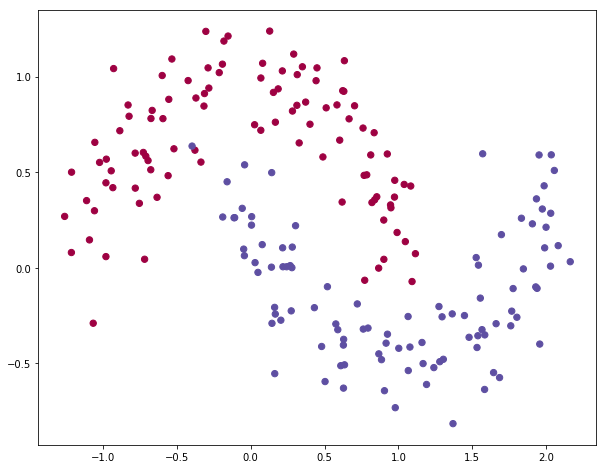

In [19]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.15)
y = y.reshape(200,1)
plt.scatter(X[:,0], X[:,1], s=40, c=y.flatten(), cmap=plt.cm.Spectral)


In [20]:
def predict(model, x):
    '''
    Predicts y_hat as 1 or 0 for a given input X
    '''
    # Do forward pass
    c = forward_prop(model,x)
    #get y_hat
    y_hat = c['a2']
    
    # Turn values to either 1 or 0
    y_hat[y_hat > 0.5] = 1
    y_hat[y_hat < 0.5] = 0
    return y_hat

In [21]:
def calc_accuracy(model,x,y):
    '''
    Calculates the accuracy of the model given an input x and a correct output y.
    The accuracy is the percentage of examples our model classified correctly
    '''
    # Get total number of examples
    m = y.shape[0]
    # Do a prediction with the model
    pred = predict(model,x)
    # Ensure prediction and truth vector y have the same shape
    pred = pred.reshape(y.shape)
    # Calculate the number of wrong examples
    error = np.sum(np.abs(pred-y))
    # Calculate accuracy
    return (m - error)/m * 100

In [22]:
def initialize_parameters(nn_input_dim,nn_hdim,nn_output_dim):
    '''
    Initializes weights with random number between -1 and 1
    Initializes bias with 0
    Assigns weights and parameters to model
    '''
    # First layer weights
    W1 = 2 *np.random.randn(nn_input_dim, nn_hdim) - 1
    
    # First layer bias
    b1 = np.zeros((1, nn_hdim))
    
    # Second layer weights
    W2 = 2 * np.random.randn(nn_hdim, nn_output_dim) - 1
    
    # Second layer bias
    b2 = np.zeros((1, nn_output_dim))
    
    # Package and return model
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

In [23]:
def update_parameters(model,grads,learning_rate):
    '''
    Updates parameters accoarding to gradient descent algorithm
    See: https://en.wikipedia.org/wiki/Gradient_descent
    '''
    # Load parameters
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Update parameters
    W1 -= learning_rate * grads['dW1']
    b1 -= learning_rate * grads['db1']
    W2 -= learning_rate * grads['dW2']
    b2 -= learning_rate * grads['db2']
    
    # Store and return parameters
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

In [24]:
def train(model,X_,y_,learning_rate, num_passes=20000, print_loss=False):
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        cache = forward_prop(model,X_)
        #a1, probs = cache['a1'],cache['a2']
        # Backpropagation
        
        grads = backward_prop(model,cache,y)
        # Gradient descent parameter update
        # Assign new parameters to the model
        model = update_parameters(model=model,grads=grads,learning_rate=learning_rate)
    
        # Pring loss & accuracy every 100 iterations
        if print_loss and i % 100 == 0:
            y_hat = cache['a2']
            print('Loss after iteration',i,':',bce_loss(y,y_hat))
            print('Accuracy after iteration',i,':',calc_accuracy(model,X_,y_),'%')
    
    return model

In [25]:
# Hyper parameters
hiden_layer_size = 3
# I picked this value because it showed good results in my experiments
learning_rate = 0.01

In [26]:
# Initialize the parameters to random values. We need to learn these.
np.random.seed(0)
# This is what we return at the end
model = initialize_parameters(nn_input_dim=2, nn_hdim= hiden_layer_size, nn_output_dim= 1)
model = train(model,X,y,learning_rate=learning_rate,num_passes=1000,print_loss=True)

Loss after iteration 0 : 0.759087263427
Accuracy after iteration 0 : 86.5 %
Loss after iteration 100 : 0.257483903227
Accuracy after iteration 100 : 87.5 %
Loss after iteration 200 : 0.232960651205
Accuracy after iteration 200 : 91.0 %
Loss after iteration 300 : 0.0660746943562
Accuracy after iteration 300 : 98.5 %
Loss after iteration 400 : 0.0390488917674
Accuracy after iteration 400 : 99.0 %
Loss after iteration 500 : 0.0316235565793
Accuracy after iteration 500 : 99.5 %
Loss after iteration 600 : 0.0280834693446
Accuracy after iteration 600 : 99.5 %
Loss after iteration 700 : 0.0259672421939
Accuracy after iteration 700 : 99.5 %
Loss after iteration 800 : 0.0245330254066
Accuracy after iteration 800 : 99.5 %
Loss after iteration 900 : 0.0234800011904
Accuracy after iteration 900 : 99.5 %


Text(0.5,1,'Decision Boundary for hidden layer size 3')

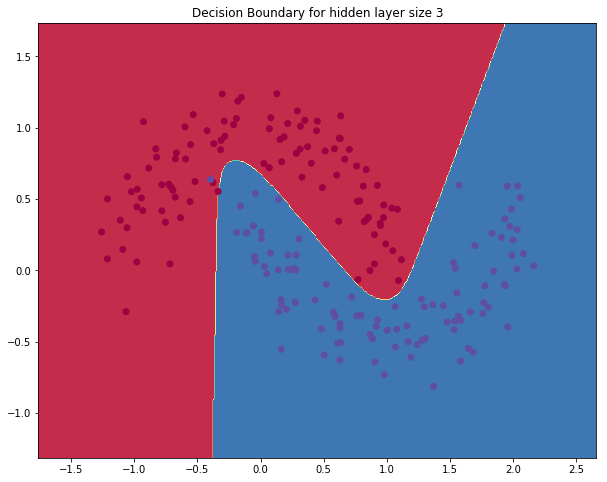

In [27]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model,x))
plt.title("Decision Boundary for hidden layer size 3")

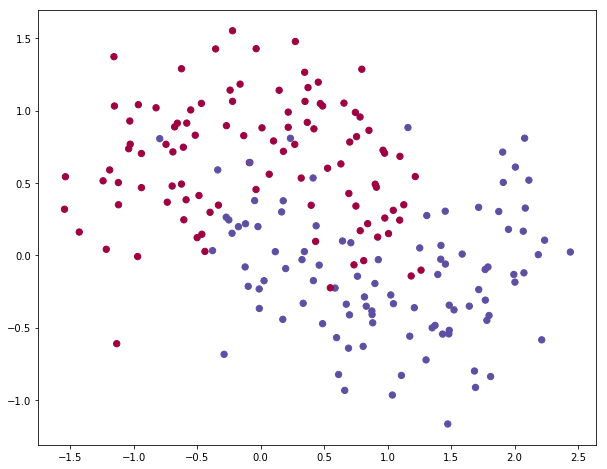

In [28]:
# Now with more noise
# Generate a dataset and plot it
np.random.seed(0)
# The data generator alows us to regulate the noise level
X, y = sklearn.datasets.make_moons(200, noise=0.3)
y = y.reshape(200,1)
plt.scatter(X[:,0], X[:,1], s=40, c=y.flatten(), cmap=plt.cm.Spectral)

In [29]:
# Hyper parameters
hiden_layer_size = 3
# I picked this value because it showed good results in my experiments
learning_rate = 0.01

# Initialize the parameters to random values. We need to learn these.
np.random.seed(0)
# This is what we return at the end
model = initialize_parameters(nn_input_dim=2, nn_hdim= hiden_layer_size, nn_output_dim= 1)
model = train(model,X,y,learning_rate=learning_rate,num_passes=1000,print_loss=True)

Loss after iteration 0 : 0.770832539775
Accuracy after iteration 0 : 82.5 %
Loss after iteration 100 : 0.348532383877
Accuracy after iteration 100 : 83.0 %
Loss after iteration 200 : 0.343649579095
Accuracy after iteration 200 : 84.0 %
Loss after iteration 300 : 0.327558064886
Accuracy after iteration 300 : 84.5 %
Loss after iteration 400 : 0.323983765178
Accuracy after iteration 400 : 85.5 %
Loss after iteration 500 : 0.322419107447
Accuracy after iteration 500 : 85.5 %
Loss after iteration 600 : 0.321468795413
Accuracy after iteration 600 : 85.5 %
Loss after iteration 700 : 0.320743912454
Accuracy after iteration 700 : 85.5 %
Loss after iteration 800 : 0.320121423988
Accuracy after iteration 800 : 85.5 %
Loss after iteration 900 : 0.319555418767
Accuracy after iteration 900 : 85.5 %


Text(0.5,1,'Decision Boundary for hidden layer size 3')

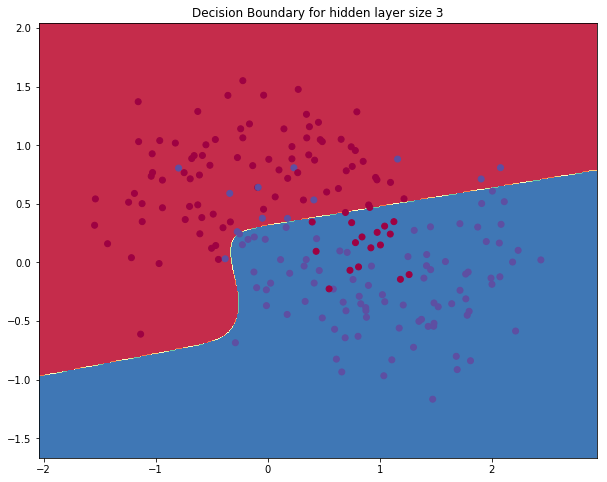

In [30]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model,x))
plt.title("Decision Boundary for hidden layer size 3")

In [31]:
# Hyper parameters
hiden_layer_size = 500
# I picked this value because it showed good results in my experiments
learning_rate = 0.01

# Initialize the parameters to random values. We need to learn these.
np.random.seed(0)
# This is what we return at the end
model = initialize_parameters(nn_input_dim=2, nn_hdim= hiden_layer_size, nn_output_dim= 1)
model = train(model,X,y,learning_rate=learning_rate,num_passes=1000,print_loss=True)

Loss after iteration 0 : 13.0664888803
Accuracy after iteration 0 : 60.5 %
Loss after iteration 100 : 3.74374393035
Accuracy after iteration 100 : 79.5 %
Loss after iteration 200 : 3.53760611488
Accuracy after iteration 200 : 90.5 %
Loss after iteration 300 : 1.63043646399
Accuracy after iteration 300 : 74.0 %
Loss after iteration 400 : 0.763330577733
Accuracy after iteration 400 : 92.0 %
Loss after iteration 500 : 0.632788970866
Accuracy after iteration 500 : 87.5 %
Loss after iteration 600 : 2.60937563667
Accuracy after iteration 600 : 89.0 %
Loss after iteration 700 : 2.15894689569
Accuracy after iteration 700 : 89.0 %
Loss after iteration 800 : 1.25100434325
Accuracy after iteration 800 : 89.0 %
Loss after iteration 900 : 0.495409315387
Accuracy after iteration 900 : 93.5 %


Text(0.5,1,'Decision Boundary for hidden layer size 500')

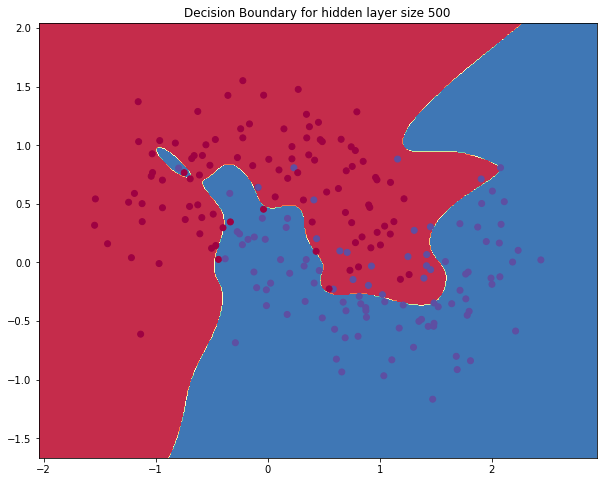

In [32]:
# Plot the decision boundary
# This might take a little while as our model is very big now
plot_decision_boundary(lambda x: predict(model,x))
plt.title("Decision Boundary for hidden layer size 500")

# Keras
In this section we will build the same model with the Keras Sequential API

In [33]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.15)
y = y.reshape(200,1)

In [34]:
from keras.layers import Dense, Activation
from keras.models import Sequential

In [41]:
model = Sequential()
model.add(Dense(3,input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [42]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['acc'])

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 9         
_________________________________________________________________
activation_3 (Activation)    (None, 3)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(X,y,epochs=900)

Epoch 1/900
200/200 [==============================] - 0s 543us/step - loss: 0.6840 - acc: 0.5900
Epoch 2/900
200/200 [==============================] - 0s 60us/step - loss: 0.6757 - acc: 0.5950
Epoch 3/900
200/200 [==============================] - 0s 61us/step - loss: 0.6682 - acc: 0.6000
Epoch 4/900
200/200 [==============================] - 0s 69us/step - loss: 0.6610 - acc: 0.6000
Epoch 5/900
200/200 [==============================] - 0s 68us/step - loss: 0.6535 - acc: 0.6100
Epoch 6/900
200/200 [==============================] - 0s 65us/step - loss: 0.6462 - acc: 0.6250
Epoch 7/900
200/200 [==============================] - 0s 62us/step - loss: 0.6391 - acc: 0.6150
Epoch 8/900
200/200 [==============================] - 0s 111us/step - loss: 0.6327 - acc: 0.6250
Epoch 9/900
200/200 [==============================] - 0s 67us/step - loss: 0.6263 - acc: 0.6350
Epoch 10/900
200/200 [==============================] - 0s 80us/step - loss: 0.6200 - acc: 0.6450
Epoch 11/900
200/200 [=====

200/200 [==============================] - 0s 85us/step - loss: 0.4142 - acc: 0.8250
Epoch 84/900
200/200 [==============================] - 0s 67us/step - loss: 0.4129 - acc: 0.8300
Epoch 85/900
200/200 [==============================] - 0s 68us/step - loss: 0.4116 - acc: 0.8350
Epoch 86/900
200/200 [==============================] - 0s 95us/step - loss: 0.4105 - acc: 0.8300
Epoch 87/900
200/200 [==============================] - 0s 91us/step - loss: 0.4092 - acc: 0.8300
Epoch 88/900
200/200 [==============================] - 0s 78us/step - loss: 0.4081 - acc: 0.8300
Epoch 89/900
200/200 [==============================] - 0s 91us/step - loss: 0.4070 - acc: 0.8300
Epoch 90/900
200/200 [==============================] - 0s 89us/step - loss: 0.4059 - acc: 0.8300
Epoch 91/900
200/200 [==============================] - 0s 80us/step - loss: 0.4047 - acc: 0.8300
Epoch 92/900
200/200 [==============================] - 0s 83us/step - loss: 0.4036 - acc: 0.8350
Epoch 93/900
200/200 [===========

200/200 [==============================] - 0s 62us/step - loss: 0.3498 - acc: 0.8500
Epoch 166/900
200/200 [==============================] - 0s 82us/step - loss: 0.3493 - acc: 0.8500
Epoch 167/900
200/200 [==============================] - 0s 64us/step - loss: 0.3488 - acc: 0.8500
Epoch 168/900
200/200 [==============================] - 0s 61us/step - loss: 0.3483 - acc: 0.8500
Epoch 169/900
200/200 [==============================] - 0s 90us/step - loss: 0.3479 - acc: 0.8500
Epoch 170/900
200/200 [==============================] - 0s 87us/step - loss: 0.3475 - acc: 0.8500
Epoch 171/900
200/200 [==============================] - 0s 82us/step - loss: 0.3470 - acc: 0.8500
Epoch 172/900
200/200 [==============================] - 0s 78us/step - loss: 0.3465 - acc: 0.8500
Epoch 173/900
200/200 [==============================] - 0s 72us/step - loss: 0.3462 - acc: 0.8500
Epoch 174/900
200/200 [==============================] - 0s 77us/step - loss: 0.3457 - acc: 0.8500
Epoch 175/900
200/200 [=

Epoch 246/900
200/200 [==============================] - 0s 63us/step - loss: 0.3222 - acc: 0.8650
Epoch 247/900
200/200 [==============================] - 0s 60us/step - loss: 0.3219 - acc: 0.8650
Epoch 248/900
200/200 [==============================] - 0s 69us/step - loss: 0.3217 - acc: 0.8650
Epoch 249/900
200/200 [==============================] - 0s 62us/step - loss: 0.3215 - acc: 0.8650
Epoch 250/900
200/200 [==============================] - 0s 61us/step - loss: 0.3213 - acc: 0.8650
Epoch 251/900
200/200 [==============================] - 0s 65us/step - loss: 0.3211 - acc: 0.8650
Epoch 252/900
200/200 [==============================] - 0s 81us/step - loss: 0.3208 - acc: 0.8700
Epoch 253/900
200/200 [==============================] - 0s 62us/step - loss: 0.3207 - acc: 0.8700
Epoch 254/900
200/200 [==============================] - 0s 74us/step - loss: 0.3204 - acc: 0.8700
Epoch 255/900
200/200 [==============================] - 0s 71us/step - loss: 0.3202 - acc: 0.8650
Epoch 256/

200/200 [==============================] - ETA: 0s - loss: 0.3853 - acc: 0.781 - 0s 60us/step - loss: 0.3086 - acc: 0.8800
Epoch 328/900
200/200 [==============================] - 0s 68us/step - loss: 0.3085 - acc: 0.8800
Epoch 329/900
200/200 [==============================] - ETA: 0s - loss: 0.2882 - acc: 0.906 - 0s 64us/step - loss: 0.3083 - acc: 0.8800
Epoch 330/900
200/200 [==============================] - 0s 60us/step - loss: 0.3081 - acc: 0.8800
Epoch 331/900
200/200 [==============================] - 0s 60us/step - loss: 0.3080 - acc: 0.8750
Epoch 332/900
200/200 [==============================] - 0s 70us/step - loss: 0.3079 - acc: 0.8800
Epoch 333/900
200/200 [==============================] - 0s 62us/step - loss: 0.3080 - acc: 0.8750
Epoch 334/900
200/200 [==============================] - 0s 75us/step - loss: 0.3076 - acc: 0.8750
Epoch 335/900
200/200 [==============================] - 0s 63us/step - loss: 0.3077 - acc: 0.8750
Epoch 336/900
200/200 [========================

200/200 [==============================] - 0s 64us/step - loss: 0.3014 - acc: 0.8800
Epoch 409/900
200/200 [==============================] - 0s 77us/step - loss: 0.3015 - acc: 0.8800
Epoch 410/900
200/200 [==============================] - 0s 68us/step - loss: 0.3013 - acc: 0.8800
Epoch 411/900
200/200 [==============================] - 0s 68us/step - loss: 0.3012 - acc: 0.8800
Epoch 412/900
200/200 [==============================] - 0s 88us/step - loss: 0.3012 - acc: 0.8800
Epoch 413/900
200/200 [==============================] - 0s 81us/step - loss: 0.3012 - acc: 0.8800
Epoch 414/900
200/200 [==============================] - 0s 77us/step - loss: 0.3010 - acc: 0.8800
Epoch 415/900
200/200 [==============================] - 0s 74us/step - loss: 0.3011 - acc: 0.8800
Epoch 416/900
200/200 [==============================] - 0s 71us/step - loss: 0.3011 - acc: 0.8750
Epoch 417/900
200/200 [==============================] - 0s 73us/step - loss: 0.3008 - acc: 0.8800
Epoch 418/900
200/200 [=

200/200 [==============================] - 0s 75us/step - loss: 0.2974 - acc: 0.8800
Epoch 491/900
200/200 [==============================] - 0s 72us/step - loss: 0.2976 - acc: 0.8750
Epoch 492/900
200/200 [==============================] - 0s 85us/step - loss: 0.2973 - acc: 0.8800
Epoch 493/900
200/200 [==============================] - 0s 69us/step - loss: 0.2973 - acc: 0.8800
Epoch 494/900
200/200 [==============================] - 0s 70us/step - loss: 0.2973 - acc: 0.8800
Epoch 495/900
200/200 [==============================] - 0s 80us/step - loss: 0.2972 - acc: 0.8800
Epoch 496/900
200/200 [==============================] - 0s 84us/step - loss: 0.2972 - acc: 0.8750
Epoch 497/900
200/200 [==============================] - 0s 77us/step - loss: 0.2971 - acc: 0.8800
Epoch 498/900
200/200 [==============================] - 0s 83us/step - loss: 0.2974 - acc: 0.8800
Epoch 499/900
200/200 [==============================] - 0s 79us/step - loss: 0.2971 - acc: 0.8800
Epoch 500/900
200/200 [=

200/200 [==============================] - 0s 91us/step - loss: 0.2949 - acc: 0.8850
Epoch 573/900
200/200 [==============================] - 0s 95us/step - loss: 0.2949 - acc: 0.8850
Epoch 574/900
200/200 [==============================] - 0s 85us/step - loss: 0.2949 - acc: 0.8850
Epoch 575/900
200/200 [==============================] - 0s 70us/step - loss: 0.2950 - acc: 0.8800
Epoch 576/900
200/200 [==============================] - 0s 98us/step - loss: 0.2949 - acc: 0.8800
Epoch 577/900
200/200 [==============================] - 0s 87us/step - loss: 0.2950 - acc: 0.8750
Epoch 578/900
200/200 [==============================] - 0s 74us/step - loss: 0.2949 - acc: 0.8750
Epoch 579/900
200/200 [==============================] - 0s 83us/step - loss: 0.2949 - acc: 0.8750
Epoch 580/900
200/200 [==============================] - 0s 67us/step - loss: 0.2948 - acc: 0.8850
Epoch 581/900
200/200 [==============================] - 0s 84us/step - loss: 0.2948 - acc: 0.8850
Epoch 582/900
200/200 [=

200/200 [==============================] - 0s 67us/step - loss: 0.2935 - acc: 0.8800
Epoch 654/900
200/200 [==============================] - 0s 68us/step - loss: 0.2933 - acc: 0.8800
Epoch 655/900
200/200 [==============================] - 0s 66us/step - loss: 0.2933 - acc: 0.8800
Epoch 656/900
200/200 [==============================] - 0s 63us/step - loss: 0.2933 - acc: 0.8800
Epoch 657/900
200/200 [==============================] - 0s 67us/step - loss: 0.2933 - acc: 0.8800
Epoch 658/900
200/200 [==============================] - 0s 74us/step - loss: 0.2932 - acc: 0.8800
Epoch 659/900
200/200 [==============================] - 0s 62us/step - loss: 0.2933 - acc: 0.8850
Epoch 660/900
200/200 [==============================] - 0s 62us/step - loss: 0.2931 - acc: 0.8800
Epoch 661/900
200/200 [==============================] - 0s 70us/step - loss: 0.2932 - acc: 0.8800
Epoch 662/900
200/200 [==============================] - 0s 67us/step - loss: 0.2931 - acc: 0.8800
Epoch 663/900
200/200 [=

200/200 [==============================] - 0s 63us/step - loss: 0.2921 - acc: 0.8800
Epoch 736/900
200/200 [==============================] - 0s 75us/step - loss: 0.2922 - acc: 0.8800
Epoch 737/900
200/200 [==============================] - 0s 62us/step - loss: 0.2921 - acc: 0.8800
Epoch 738/900
200/200 [==============================] - 0s 58us/step - loss: 0.2921 - acc: 0.8800
Epoch 739/900
200/200 [==============================] - 0s 65us/step - loss: 0.2920 - acc: 0.8800
Epoch 740/900
200/200 [==============================] - 0s 60us/step - loss: 0.2921 - acc: 0.8800
Epoch 741/900
200/200 [==============================] - 0s 62us/step - loss: 0.2921 - acc: 0.8800
Epoch 742/900
200/200 [==============================] - 0s 64us/step - loss: 0.2921 - acc: 0.8800
Epoch 743/900
200/200 [==============================] - 0s 68us/step - loss: 0.2922 - acc: 0.8800
Epoch 744/900
200/200 [==============================] - 0s 64us/step - loss: 0.2921 - acc: 0.8800
Epoch 745/900
200/200 [=

200/200 [==============================] - 0s 71us/step - loss: 0.2910 - acc: 0.8800
Epoch 818/900
200/200 [==============================] - 0s 73us/step - loss: 0.2912 - acc: 0.8800
Epoch 819/900
200/200 [==============================] - 0s 67us/step - loss: 0.2911 - acc: 0.8800
Epoch 820/900
200/200 [==============================] - 0s 68us/step - loss: 0.2910 - acc: 0.8800
Epoch 821/900
200/200 [==============================] - 0s 77us/step - loss: 0.2910 - acc: 0.8800
Epoch 822/900
200/200 [==============================] - 0s 71us/step - loss: 0.2909 - acc: 0.8800
Epoch 823/900
200/200 [==============================] - 0s 77us/step - loss: 0.2910 - acc: 0.8800
Epoch 824/900
200/200 [==============================] - 0s 85us/step - loss: 0.2910 - acc: 0.8750
Epoch 825/900
200/200 [==============================] - ETA: 0s - loss: 0.2227 - acc: 0.906 - 0s 95us/step - loss: 0.2909 - acc: 0.8800
Epoch 826/900
200/200 [==============================] - 0s 120us/step - loss: 0.2909

200/200 [==============================] - 0s 76us/step - loss: 0.2901 - acc: 0.8800
Epoch 899/900
200/200 [==============================] - 0s 90us/step - loss: 0.2900 - acc: 0.8800
Epoch 900/900
200/200 [==============================] - 0s 87us/step - loss: 0.2901 - acc: 0.8800
